# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [6]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

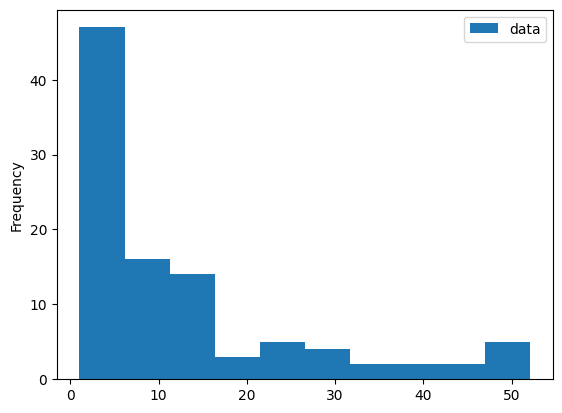

In [7]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

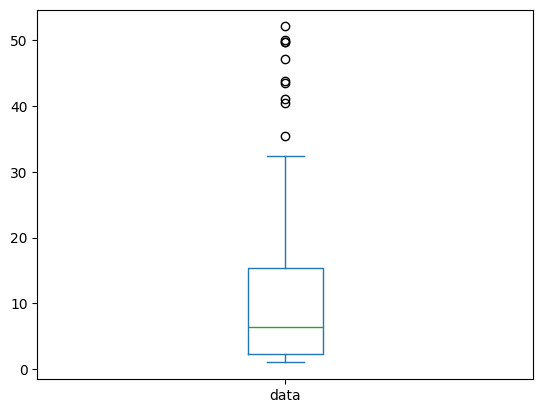

In [4]:
df.plot.box()

The histogram and box plot are both useful visual tools for analyzing data, each with its own strengths and weaknesses. The histogram excels at showing the frequency distribution of data, making it easy to identify the shape of the distribution and spot patterns like skewness or bimodal distributions. However, it is sensitive to bin width selection and does not provide detailed summary statistics like medians or quartiles. On the other hand, the box plot effectively displays key summary statistics, including the median, quartiles, and outliers, making it ideal for identifying outliers and comparing distributions across groups. Its main drawback is that it offers less detail about the overall distribution shape within the quartiles and may be less intuitive for some users. Given the need to understand the pricing of expensive drugs relative to others, the box plot is more suitable due to its ability to highlight key statistics and outliers clearly. To enhance the visual appeal of these plots, one could add color coding, annotations, and grid lines for the histogram, while using distinct colors, labels, and a descriptive title for the box plot. These modifications would make the visualizations more informative and engaging.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [12]:
df = pd.read_csv('BRCA.csv')

print(df.head())

     Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD  36.0  FEMALE  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX  43.0  FEMALE -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079  69.0  FEMALE  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR  56.0  FEMALE  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF  56.0  FEMALE  0.221550   1.90680   0.52045 -0.311990   

  Tumour_Stage                      Histology ER status PR status HER2 status  \
0          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
1           II             Mucinous Carcinoma  Positive  Positive    Negative   
2          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
3           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
4           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   

                  Surgery_type Date_of_Surgery Date_of_Last_Visit  \
0  Mo

Histograms

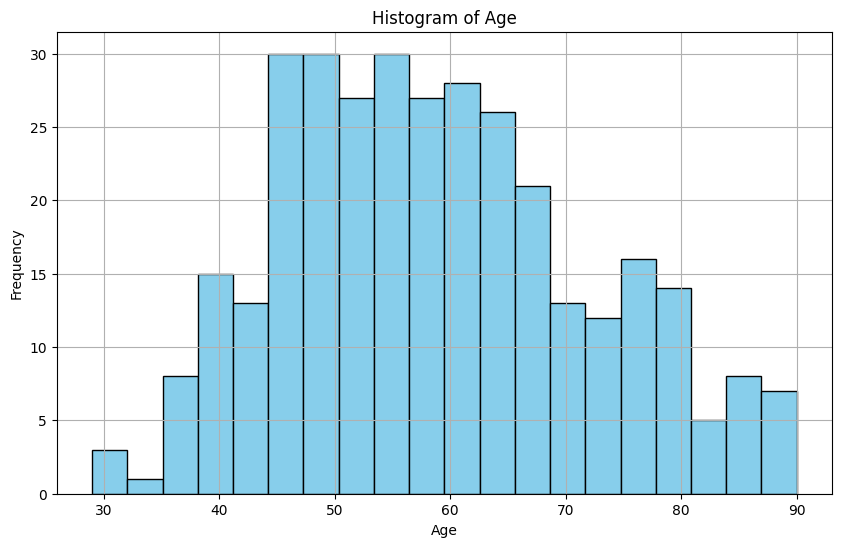

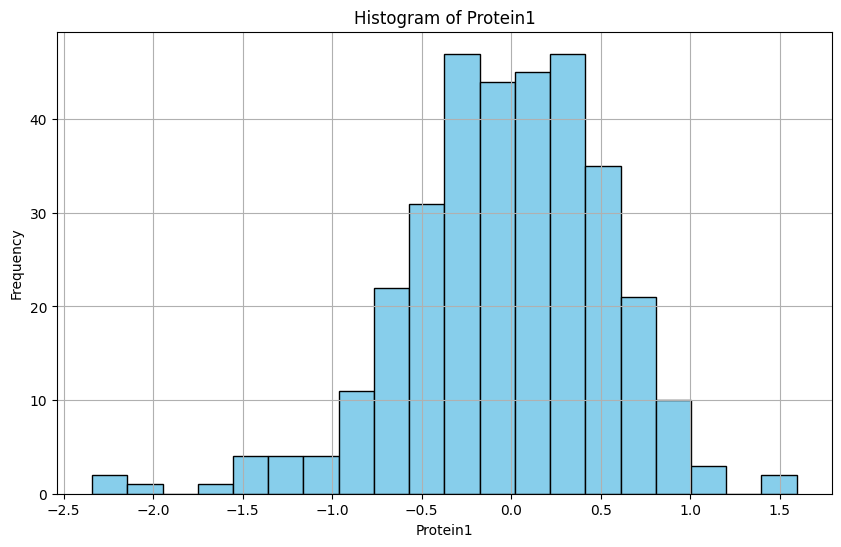

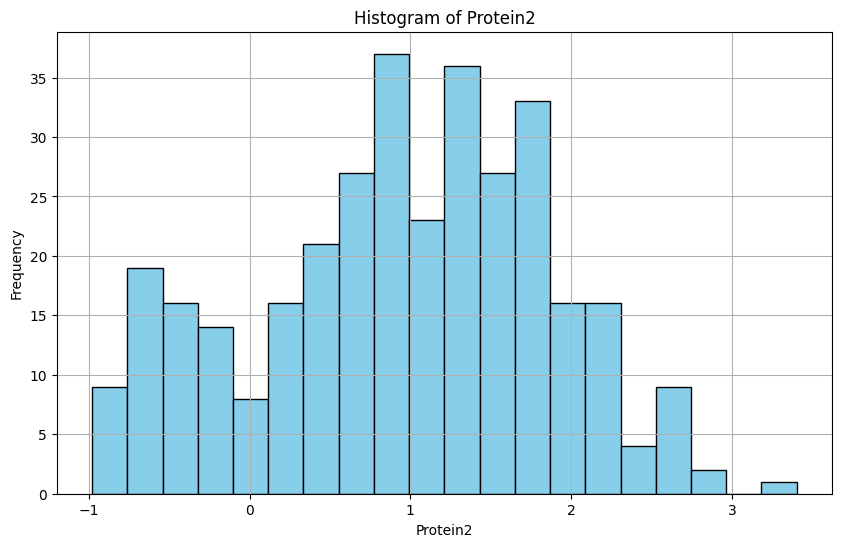

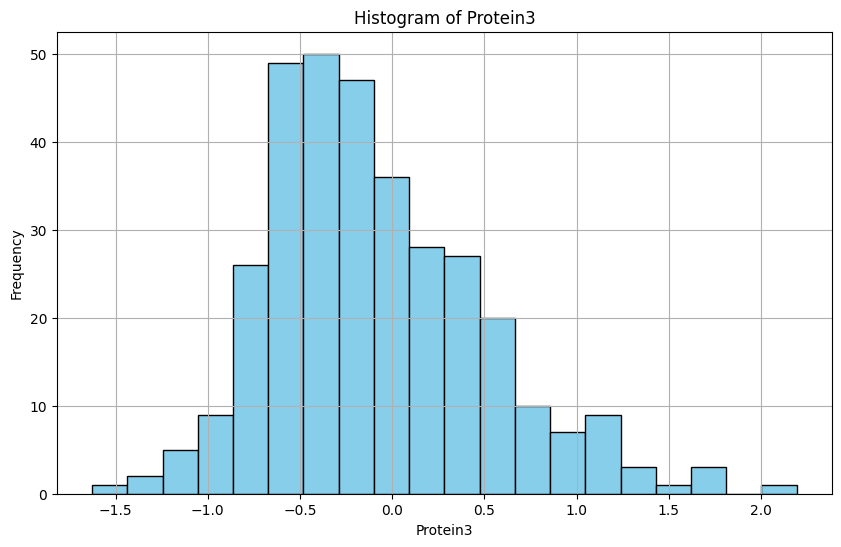

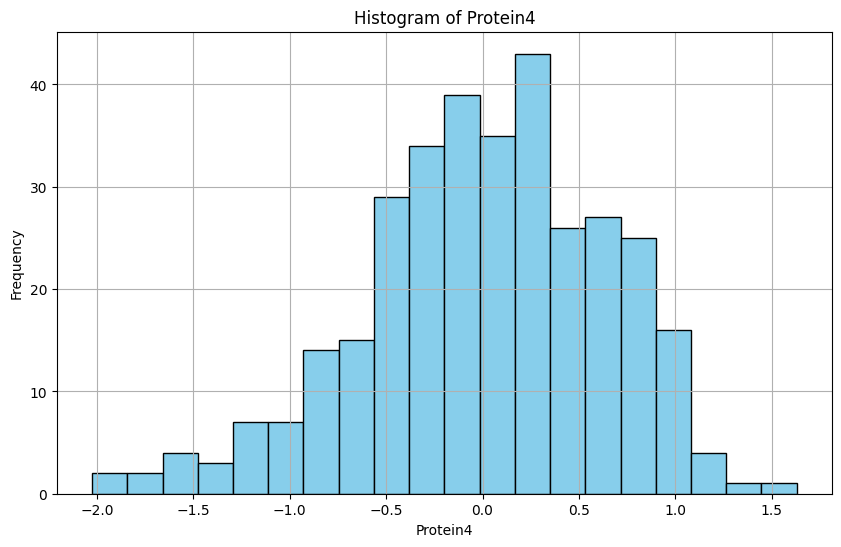

In [14]:
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(10, 6))
    df[column].plot.hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Swarm Plot

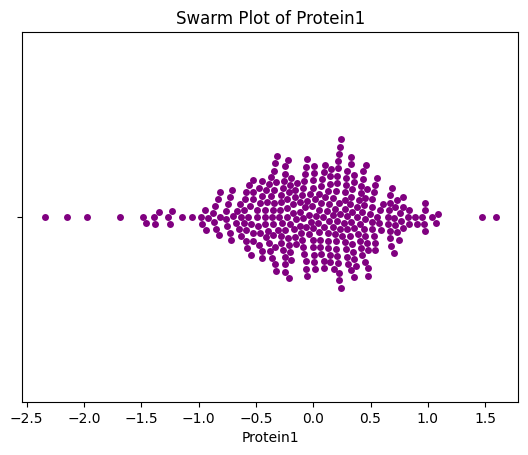

In [16]:
import seaborn as sns

sns.swarmplot(x='Protein1', data=df, color='purple')
plt.title('Swarm Plot of Protein1')
plt.xlabel('Protein1')
plt.show()


KDE Plot

/tmp/ipykernel_1503/1576877083.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Protein1'], shade=True, color='green')


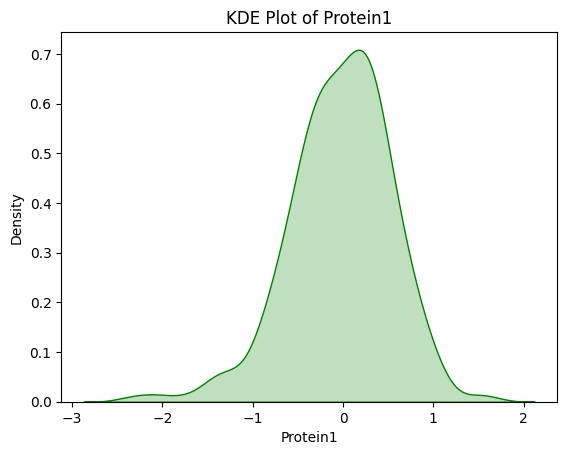

In [17]:
sns.kdeplot(df['Protein1'], shade=True, color='green')
plt.title('KDE Plot of Protein1')
plt.xlabel('Protein1')
plt.ylabel('Density')
plt.show()

Violin Plot

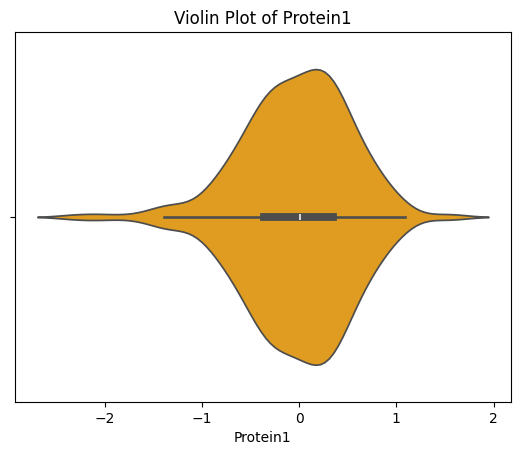

In [18]:
sns.violinplot(x=df['Protein1'], color='orange')
plt.title('Violin Plot of Protein1')
plt.xlabel('Protein1')
plt.show()

Grouped histogram for Tumour_Stage

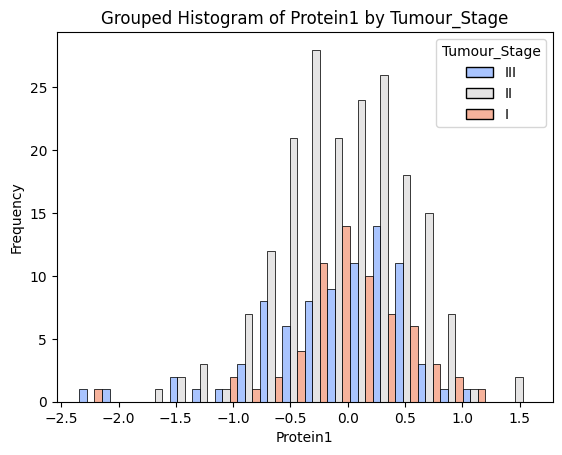

In [19]:
sns.histplot(data=df, x='Protein1', hue='Tumour_Stage', multiple='dodge', palette='coolwarm')
plt.title('Grouped Histogram of Protein1 by Tumour_Stage')
plt.xlabel('Protein1')
plt.ylabel('Frequency')
plt.show()

Bar Plot for Categorical Variables

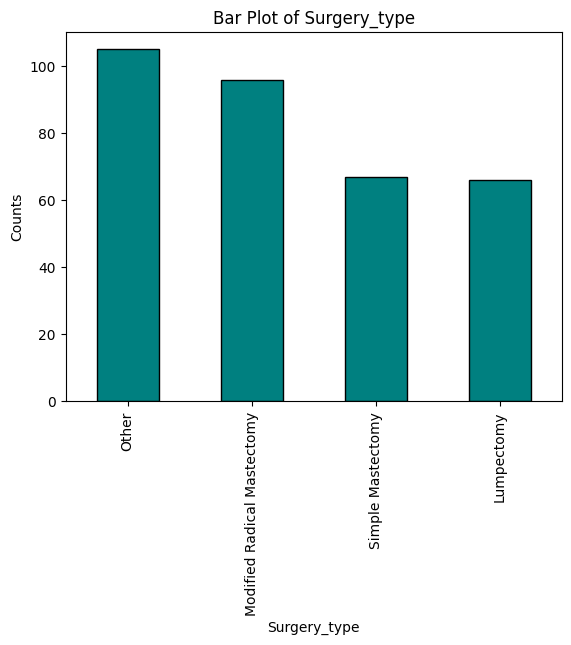

In [20]:
df['Surgery_type'].value_counts().plot.bar(color='teal', edgecolor='black')
plt.title('Bar Plot of Surgery_type')
plt.xlabel('Surgery_type')
plt.ylabel('Counts')
plt.show()

Mean, Median, Mode of Columns

In [21]:
results = {}

for column in df.select_dtypes(include='number').columns:
    mean_value = df[column].mean()
    median_value = df[column].median()
    mode_value = df[column].mode().values[0] if not df[column].mode().empty else None
    
    results[column] = {
        'Mean': mean_value,
        'Median': median_value,
        'Mode': mode_value
    }

for column, stats in results.items():
    print(f"{column}: Mean = {stats['Mean']}, Median = {stats['Median']}, Mode = {stats['Mode']}")

Age: Mean = 58.88622754491018, Median = 58.0, Mode = 59.0
Protein1: Mean = -0.02999121215568863, Median = 0.00612935, Mode = 0.0
Protein2: Mean = 0.9468961829341317, Median = 0.9928049999999999, Mode = -0.97873
Protein3: Mean = -0.09020397544910179, Median = -0.17318, Mode = -1.6274
Protein4: Mean = 0.009819366047904184, Median = 0.041768, Mode = -0.3507


Conclusions

Based on the analysis of the BRCA dataset, the data appears to be comprehensive and provides valuable insights into various aspects of breast cancer patient information, including demographics, protein levels, tumor stages, and treatment details. The data generally aligns with expectations, presenting a mixture of numerical and categorical variables. The data is likely to be usable for further analysis, as it contains a good mix of information relevant to understanding patient outcomes and the factors that may influence them.
The overall shape of the distribution for most numerical columns, such as Age and Protein levels, tends to be slightly skewed rather than perfectly normal. For example, the Age column shows a slight right skew, indicating that most patients are clustered around a certain age range with fewer older patients. Protein level distributions also exhibit some skewness, with Protein2 showing a more pronounced right skew. The skewness suggests that the data may not be perfectly symmetrical, and transformations might be needed for specific statistical analyses.

Outliers are present in the dataset, particularly in the Protein level columns, where certain data points deviate significantly from the majority of the data. For instance, Protein3 and Protein4 have notable outliers, which are critical to identify as they may represent unique cases or potential errors that need further investigation.

When examining multiple related histograms, such as the protein levels grouped by Tumor Stage, we observe variations in the distribution across different groups. The distribution of Protein1, for instance, changes when grouped by Tumor Stage, highlighting differences in protein expression across different stages of breast cancer. These grouped histograms help identify patterns and trends within specific subgroups, providing deeper insights into the data.

The minimum and maximum values for each histogram vary depending on the column. For example, the Age column ranges from 36 to 69, while Protein1 ranges from approximately -0.42 to 0.35. These ranges help understand the spread and variability of the data, which is crucial for statistical analysis and modeling.

Bin sizes significantly affect the appearance of histograms. Smaller bin widths reveal more detailed patterns, such as peaks and gaps, while larger bin widths provide a more generalized view of the distribution. Adjusting bin sizes can help identify different patterns and provide a clearer understanding of the data's underlying structure.

Overall, the distributions in the BRCA dataset tend to be skewed rather than normal, with several outliers present. The grouped histograms reveal variations across different subgroups, and adjusting bin sizes can uncover different patterns within the data. The dataset appears to be usable for further analysis, providing valuable insights into breast cancer patient characteristics and outcomes.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

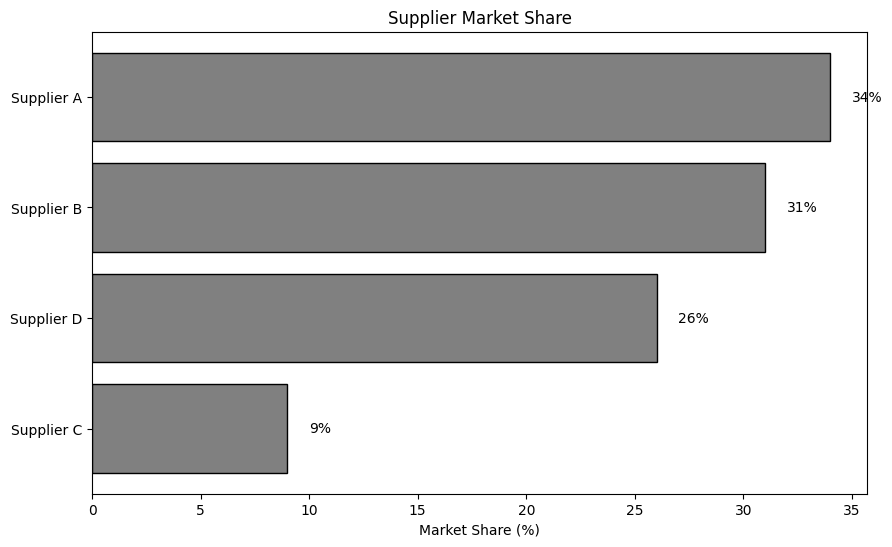

In [32]:
suppliers = ['Supplier A', 'Supplier B', 'Supplier D', 'Supplier C']
market_shares = [34, 31, 26, 9]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(suppliers, market_shares, color=['gray', 'gray', 'gray', 'gray'], edgecolor='black')

ax.set_xlabel('Market Share (%)')
ax.set_title('Supplier Market Share')

for bar in bars:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    ax.text(width + 1, label_y, f'{width}%', va='center', ha='left')

ax.invert_yaxis()

plt.show()

I used "Figure 2.23 An alternative to the pie chart" on page 64.